# Block-Separate Optimizer PINN

In [ ]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..", "")))

import torch
from src.data_generator.diffusion_equations import DiffusionEquationDataset
from src.train.train_block_coordinate_optimizer import train_bcd
from src.figures.figures import plot_sample, plot_physical_property
from src.models.basic import alpha_network, u_network
from src.loss_function.bcd_loss import ULoss, AlphaLoss


# For PyTorch random
torch.manual_seed(45)

# Create Dataset
dataset = DiffusionEquationDataset(n_samples=1, nx=100, nt=100,T=100, L=1)

# Define PINNS
alpha_net = alpha_network()
u_net = u_network()

# training
u_net.train()
alpha_net.train()

lr = 1e-2
optimizer_u = torch.optim.Adam(list(u_net.parameters()), lr=lr)
optimizer_alpha = torch.optim.Adam(list(alpha_net.parameters()), lr=lr)

loss_u = ULoss()
loss_alpha = AlphaLoss()

train_bcd(
    loss_function_u=loss_u,
    loss_function_alpha=loss_alpha,
    optimizer_u=optimizer_u,
    optimizer_alpha=optimizer_alpha,
    dataset=dataset,
    u_net=u_net,
    alpha_net=alpha_net,
    epochs=3000
)


Epoch 0: Loss = 2.3043e-01
Epoch 20: Loss = 9.2074e-02
Epoch 40: Loss = 7.6194e-02
Epoch 60: Loss = 6.7995e-02
Epoch 80: Loss = 6.6354e-02
Epoch 100: Loss = 6.5458e-02
Epoch 120: Loss = 6.3947e-02
Epoch 140: Loss = 6.1016e-02
Epoch 160: Loss = 5.6446e-02
Epoch 180: Loss = 5.1060e-02
Epoch 200: Loss = 4.4667e-02
Epoch 220: Loss = 3.8427e-02
Epoch 240: Loss = 3.2345e-02
Epoch 260: Loss = 2.7144e-02
Epoch 280: Loss = 2.2553e-02
Epoch 300: Loss = 1.9131e-02
Epoch 320: Loss = 1.6390e-02
Epoch 340: Loss = 1.4415e-02
Epoch 360: Loss = 1.2954e-02
Epoch 380: Loss = 1.1860e-02
Epoch 400: Loss = 1.1039e-02
Epoch 420: Loss = 1.1036e-02
Epoch 440: Loss = 1.0040e-02
Epoch 460: Loss = 9.6179e-03
Epoch 480: Loss = 9.3361e-03
Epoch 500: Loss = 9.0098e-03
Epoch 520: Loss = 7.9281e-03
Epoch 540: Loss = 4.6863e-03
Epoch 560: Loss = 3.8130e-03
Epoch 580: Loss = 3.3997e-03
Epoch 600: Loss = 2.8498e-03
Epoch 620: Loss = 2.5683e-03
Epoch 640: Loss = 2.3805e-03
Epoch 660: Loss = 2.2421e-03
Epoch 680: Loss = 2.

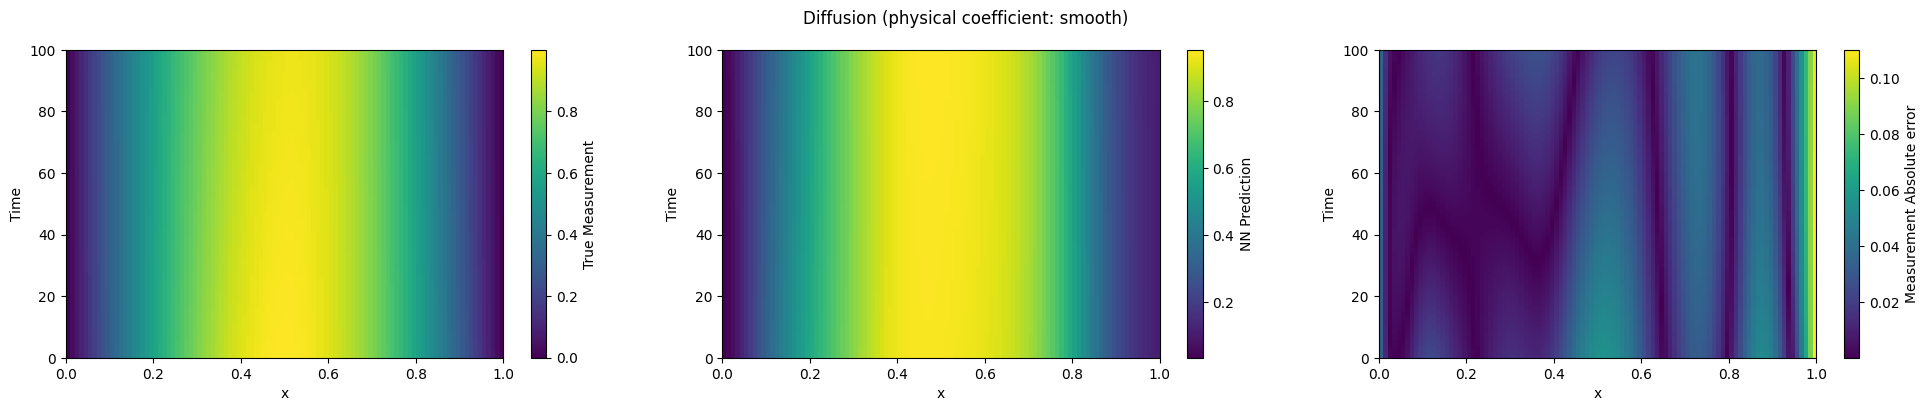

In [2]:
u_net.eval()
alpha_net.eval()
sample = dataset[0]

u_xt = u_net(xt=sample['xt'])
plot_sample(sample, u_xt, xt_pred_mesh=sample)

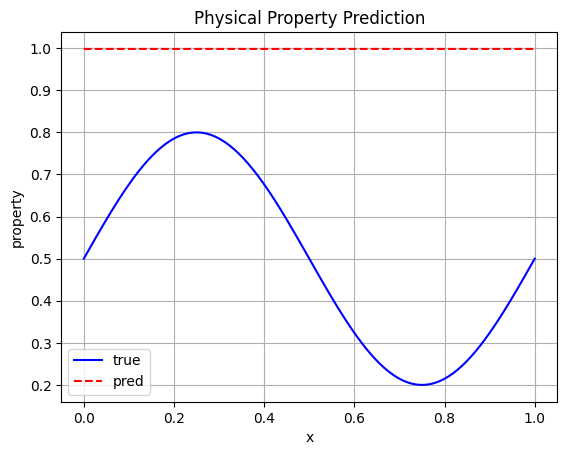

In [5]:
x = sample['x'].detach().numpy()[:,0]
property_pred = alpha_net(x=sample['x']).detach().numpy()[:,0]
property_true = sample["alpha"].detach().numpy()

plot_physical_property(x=x, property_pred=property_pred, property_true=property_true)